In [56]:
library(readr)
library(dplyr)
library(ggplot2)

Leitura de dados brutos

In [57]:
dados_1d_julia <- read_csv("../stats/results/julia_1d_results.csv", show_col_types = FALSE) 
dados_2d_julia <- read_csv("../stats/results/julia_2d_results.csv", show_col_types = FALSE) 
dados_3d_julia <- read_csv("../stats/results/julia_3d_results.csv", show_col_types = FALSE) 

dados_1d_python <- read_csv("../stats/results/python_1d_results.csv", show_col_types = FALSE) 
dados_2d_python <- read_csv("../stats/results/python_2d_results.csv", show_col_types = FALSE)
dados_3d_python <- read_csv("../stats/results/python_3d_results.csv", show_col_types = FALSE)

Agrega os dados de cada linguagem e ordena de acordo com a variavel Size

In [58]:
dados_combinados_julia <- bind_rows(dados_1d_julia, dados_2d_julia, dados_3d_julia)
dados_combinados_julia$Size <- factor(dados_combinados_julia$Size, levels = c("low", "mid", "high"))

dados_combinados_python <- bind_rows(dados_1d_python, dados_2d_python, dados_3d_python)
dados_combinados_python$Size <- factor(dados_combinados_python$Size, levels = c("low", "mid", "high"))

dados_combinados_julia_python <- bind_rows(dados_1d_julia, dados_2d_julia, dados_3d_julia, dados_1d_julia, dados_2d_python, dados_3d_python)

Plotagem dos graficos de violino de Julia

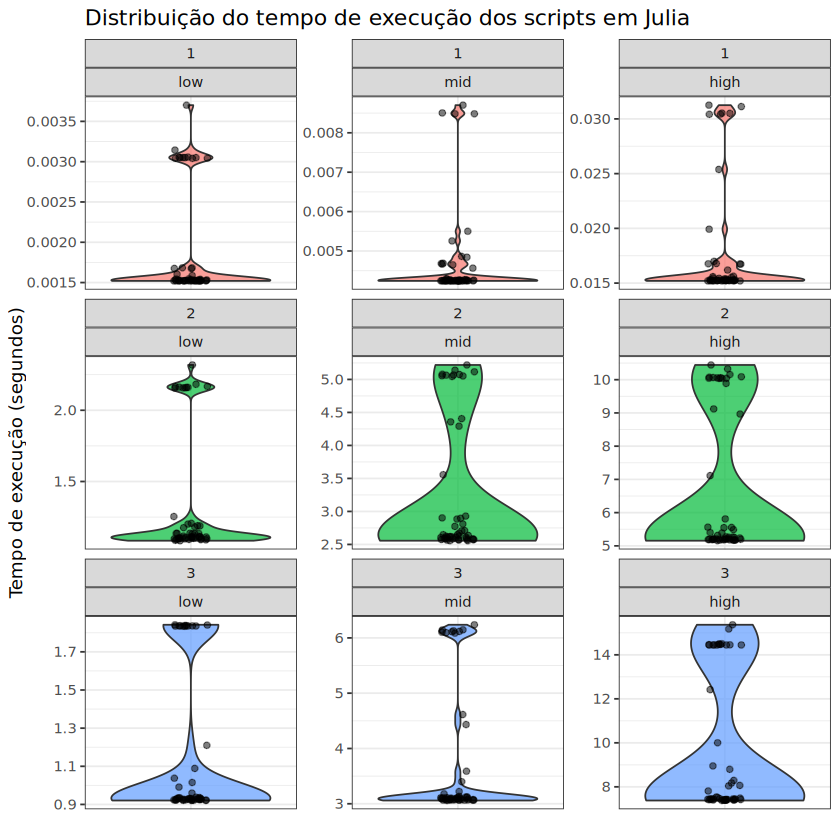

In [59]:
ggplot(dados_combinados_julia, aes(x = "", y = t_exec, fill = as.factor(dimension))) +
  geom_violin(alpha = 0.7) +
  geom_jitter(width = 0.1, alpha = 0.5) +

  facet_wrap(~ dimension + Size, scales = "free") +

  labs(
    title = "Distribuição do tempo de execução dos scripts em Julia",
    x = "",
    y = "Tempo de execução (segundos)"
  ) +
  
  theme_bw() +
  guides(fill = "none") +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

Plotagem dos graficos de violino de Python

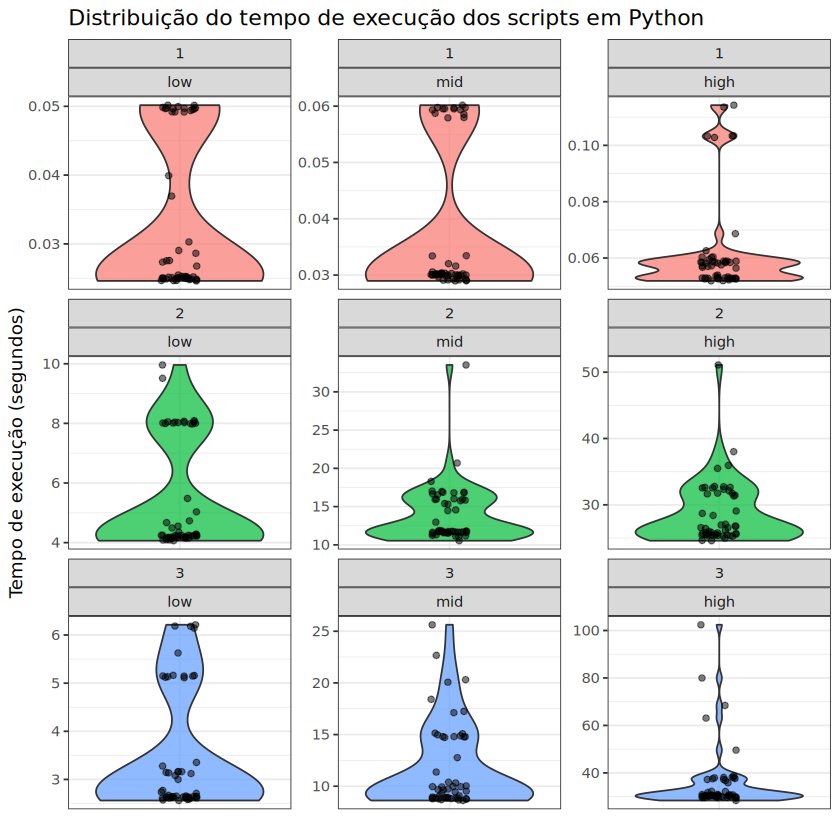

In [60]:
ggplot(dados_combinados_python, aes(x = as.factor(Size), y = t_exec, fill = as.factor(dimension))) +
  geom_violin(alpha = 0.7) +
  geom_jitter(width = 0.1, alpha = 0.5) +
  
  facet_wrap(~ dimension + Size, scales = "free") +
  
  labs(
    title = "Distribuição do tempo de execução dos scripts em Python",
    x = "",
    y = "Tempo de execução (segundos)"
  ) +
  theme_bw() +
  guides(fill = "none") +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

Plotagem dos graficos boxplot do tempo de execucao dos script em Julia

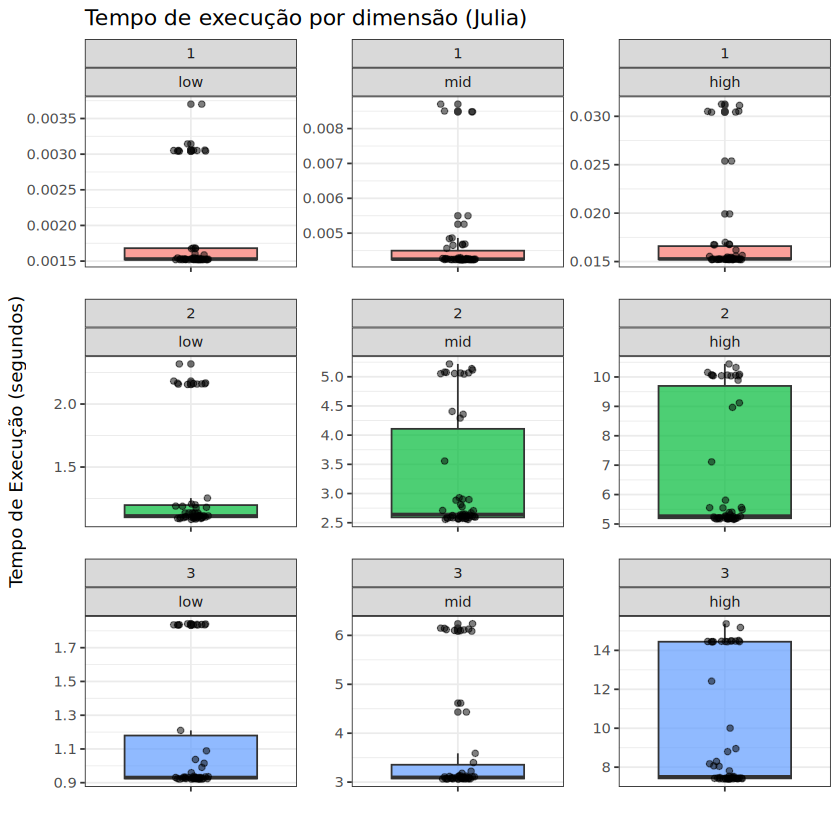

In [61]:
ggplot(dados_combinados_julia, aes(x = "", y = t_exec, fill = as.factor(dimension))) +
  geom_boxplot(alpha = 0.7) +
  geom_jitter(width = 0.1, alpha = 0.5) +
  
  facet_wrap(~ dimension + Size, scales = "free") +
  
  labs(
    title = "Tempo de execução por dimensão (Julia)",
    x = "",
    y = "Tempo de Execução (segundos)"
  ) +
  theme_bw() +
  guides(fill = "none")

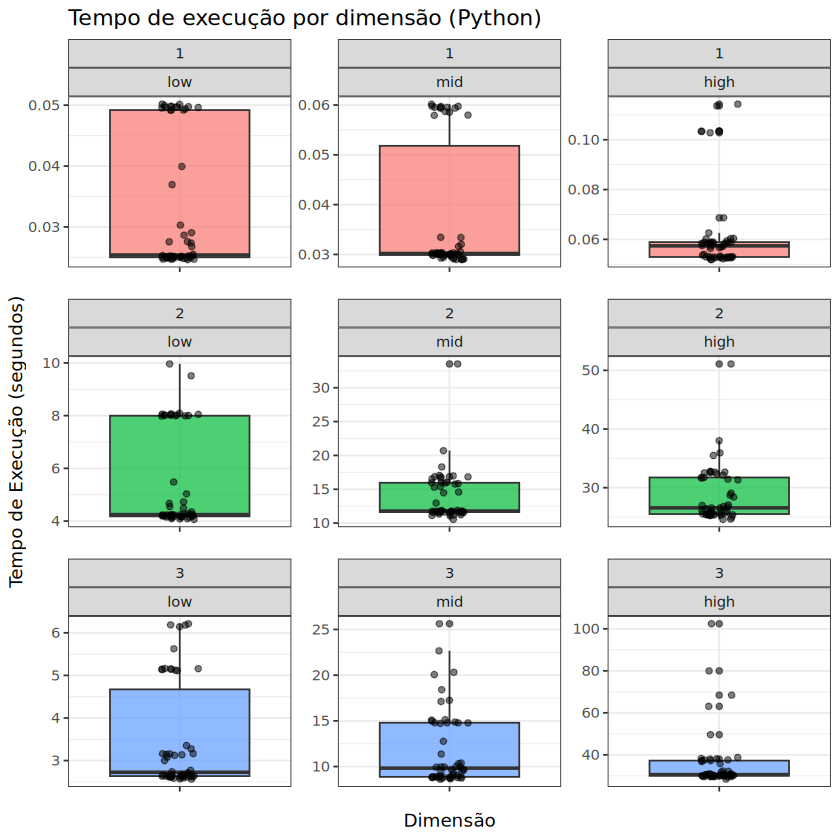

In [62]:
ggplot(dados_combinados_python, aes(x = "", y = t_exec, fill = as.factor(dimension))) +
  geom_boxplot(alpha = 0.7) +
  geom_jitter(width = 0.1, alpha = 0.5) +
  
  facet_wrap(~ dimension + Size, scales = "free") +
  
  labs(
    title = "Tempo de execução por dimensão (Python)",
    x = "Dimensão",
    y = "Tempo de Execução (segundos)"
  ) +
  theme_bw() +
  guides(fill = "none")

In [ ]:
dados_julia_1d <- read_csv("../stats/results/julia_1d_results.csv", show_col_types = FALSE) %>% mutate(language = "Julia")
dados_julia_2d <- read_csv("../stats/results/julia_2d_results.csv", show_col_types = FALSE) %>% mutate(language = "Julia")
dados_julia_3d <- read_csv("../stats/results/julia_3d_results.csv", show_col_types = FALSE) %>% mutate(language = "Julia")

dados_python_1d <- read_csv("../stats/results/python_1d_results.csv", show_col_types = FALSE) %>% mutate(language = "Python")
dados_python_2d <- read_csv("../stats/results/python_2d_results.csv", show_col_types = FALSE) %>% mutate(language = "Python")
dados_python_3d <- read_csv("../stats/results/python_3d_results.csv", show_col_types = FALSE) %>% mutate(language = "Python")

dados_combinados <- bind_rows(
  dados_julia_1d, dados_julia_2d, dados_julia_3d,
  dados_python_1d, dados_python_2d, dados_python_3d
)

ordem_correta <- dados_combinados %>%
  select(Size, L_Value) %>%
  distinct() %>%
  arrange(L_Value)

niveis_ordenados <- paste0(ordem_correta$Size, " (L = ", ordem_correta$L_Value, ")")

dados_para_plot <- dados_combinados %>%
  mutate(Size_Label = paste0(Size, " (L = ", L_Value, ")"))

dados_para_plot$Size_Label <- factor(
  dados_para_plot$Size_Label,
  levels = niveis_ordenados
)


ggplot(dados_para_plot, aes(x = language, y = t_exec, fill = language)) +
  geom_boxplot(alpha = 0.8) +
  geom_jitter(width = 0.1, alpha = 0.4) +
  facet_wrap(~ Size_Label + dimension, scales = "free") +

  scale_fill_manual(values = c("Julia" = "#9558B2", "Python" = "#3C78D8")) +

  labs(
    title = "Comparativo de Desempenho: Julia vs. Python",
    x = "", 
    y = "Tempo de Execução (segundos, escala log)" 
  ) +

  theme_bw() +
  guides(fill = "none")

ERROR: Error in parse(text = input): <text>:11:3: unexpected symbol
10:   dados_julia_1d, dados_julia_2d, dados_julia_3d
11:   dados_python_1d
      ^
